In [51]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style("white")


In [40]:
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [15., 6.]

In [41]:
battles=pd.read_csv('battles.csv')
character_prediction=pd.read_csv('character-predictions.csv')
character_deaths=pd.read_csv('character-deaths.csv')

In [42]:
#define additional columns related to defender count, attacker count, commander on attacking side, no of books a character appeared in

#battles.loc[:,'defender_count']
#list=[x for x in [battles[['defender_1','defender_2','defender_3','defender_4']]]]


#[x for x in battles[['defender_1','defender_2','defender_3','defender_4']]]
#battles[['defender_1','defender_2','defender_3','defender_4']]
battles.loc[:,'defender_count']=4-battles[['defender_1','defender_2','defender_3','defender_4']].isnull().sum(axis=1)
battles.loc[:,'attacker_count']=4-battles[['attacker_1','attacker_2','attacker_3','attacker_4']].isnull().sum(axis=1)
#battles.loc[:,'att_comm_count']=4-battles[['defender_1','defender_2','defender_3','defender_4']].isnull().sum(axis=1)
battles.loc[:,'att_comm_count']=[len(x.split(',')) if pd.isnull(x)!=True else np.nan for x in battles['attacker_commander']]

In [43]:
# number of commanders on attacking side
#[type(x) for x in battles['att_comm_count']]
#[type(len(x.split(','))) if pd.isnull(x)!=True else np.nan for x in battles['attacker_commander']]


In [44]:
character_prediction.loc[:,'no_of_books']=character_prediction[['book1', 'book2', 'book3', 'book4', 'book5']].sum(axis=1)

In [45]:
battles[['year','major_capture']].groupby('year').size()

year
298     7
299    20
300    11
dtype: int64

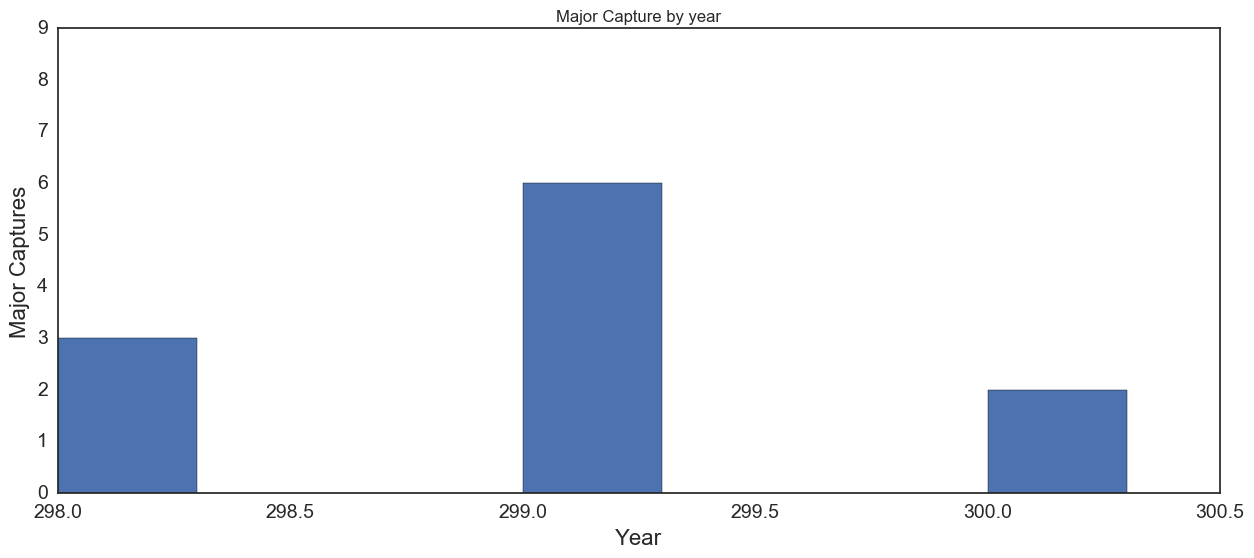

In [69]:
#battles[['year','major_capture']].groupby('year').size()
mc=battles[['year','major_capture']].groupby('year').sum().values
year=battles['year'].unique()
plt.bar(year,mc,width=0.3)
plt.ylim(0,9)
plt.xlabel('Year')
plt.ylabel('Major Captures')
plt.title('Major Capture by year')
plt.show()

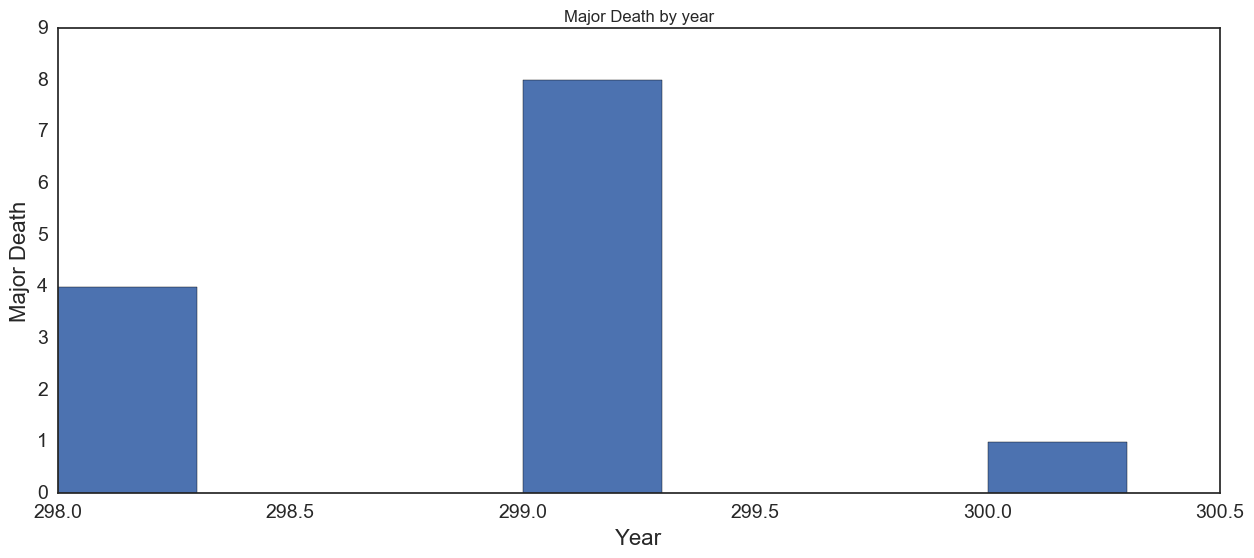

In [68]:
mc=battles[['year','major_death']].groupby('year').sum().values
year=battles['year'].unique()
plt.bar(year,mc,width=0.3)
plt.xlabel('Year')
plt.ylim(0,9)
plt.ylabel('Major Death')
plt.title('Major Death by year')
plt.show()

In [74]:
battles[['attacker_size','defender_size','attacker_outcome']].head()

,attacker_size,defender_size,attacker_outcome
0,15000.0,4000.0,win
1,NaN,120.0,win
2,15000.0,10000.0,win
3,18000.0,20000.0,loss
4,1875.0,6000.0,win


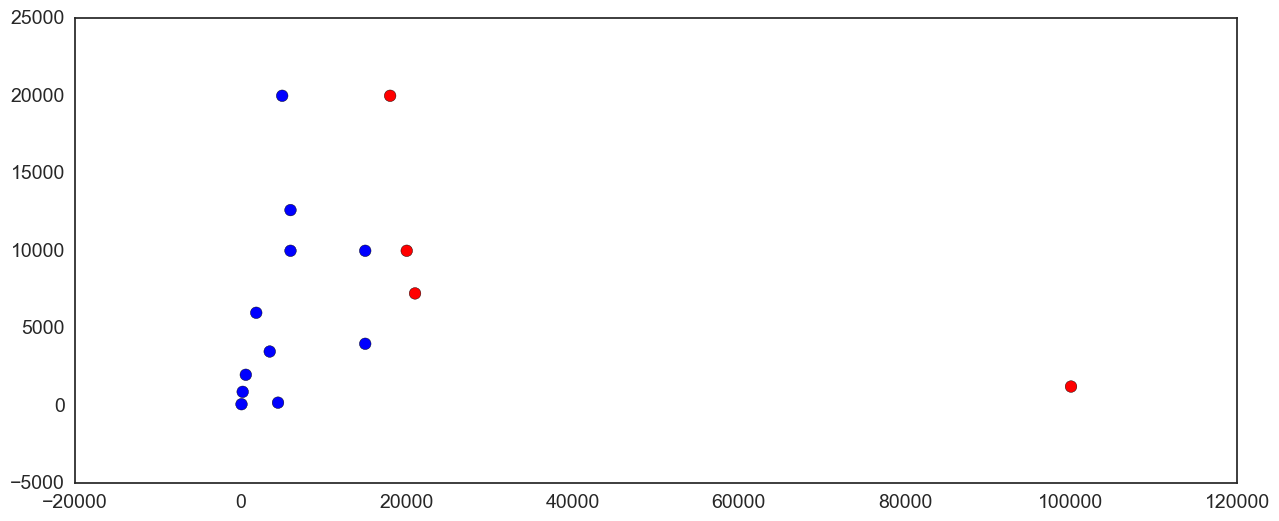

In [89]:
df=battles[['attacker_size','defender_size','attacker_outcome']].dropna()
colors=['b' if x=='win' else 'r' for x in df['attacker_outcome']]
plt.scatter(df['attacker_size'], df['defender_size'],s=70,c=colors)
plt.show()

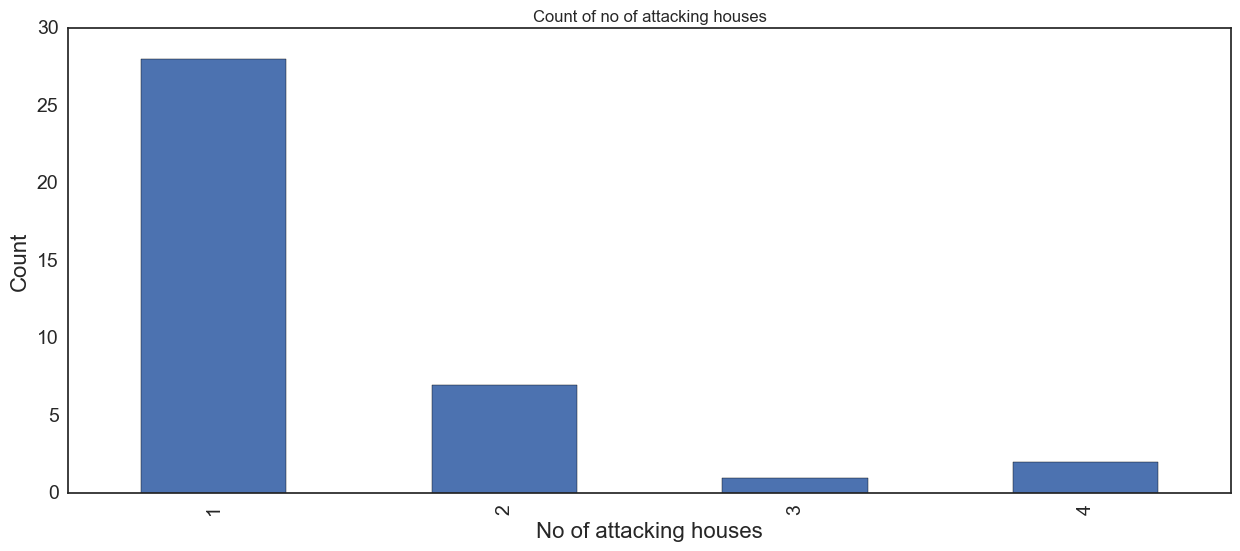

In [105]:
battles['attacker_count'].value_counts().sort_index().plot.bar()
plt.xlabel('No of attacking houses')
plt.ylabel('Count')
plt.title('Count of no of attacking houses')
plt.show()

In [106]:
battles[['attacker_1','attacker_2','attacker_3','attacker_4','defender_1','defender_2','defender_3','defender_4']]

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
5,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
6,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN
7,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
8,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
9,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN


In [110]:
battles[['attacker_king','defender_king']].dropna().shape

(35, 2)

In [113]:
for x in battles['attacker_king']:
    print(x)
        

Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
Robb Stark
Robb Stark
Robb Stark
Joffrey/Tommen Baratheon
Balon/Euron Greyjoy
Balon/Euron Greyjoy
Balon/Euron Greyjoy
Robb Stark
Balon/Euron Greyjoy
Balon/Euron Greyjoy
Joffrey/Tommen Baratheon
Robb Stark
Stannis Baratheon
Joffrey/Tommen Baratheon
Robb Stark
Robb Stark
Stannis Baratheon
Robb Stark
Robb Stark
nan
Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
Robb Stark
Stannis Baratheon
Joffrey/Tommen Baratheon
nan
Stannis Baratheon
Balon/Euron Greyjoy
Balon/Euron Greyjoy
Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
Joffrey/Tommen Baratheon
Stannis Baratheon
